In [15]:
'''
The core data type in Numpy is the ndarray, which enables fast and space-efficient 
multidimensional array processing.
Note: This notebook is adapted from chapter 4 Python for Data Analysis by Wes McKinney 
and O'Reilly publishing. 
NumPy has many, many features that won't be covered here. 
The following snippets are just to illustrate basic data types and operations within numpy.

Another good resource for learning more about ndarrays is here:
http://docs.scipy.org/doc/numpy/reference/arrays.html
'''

#First, import NumPy
#import numpy imports the numpy module under the np namespace, 
#so you would need to call objects within numpy using np.foo
#good reference: http://docs.python-guide.org/en/latest/writing/structure/#modules
#"from numpy import *" imports all objects from the numpy module into your current namespace, 
#so you would call objects within numpy using only foo. 
import numpy as np

#It is easy to create Nx1 and NxM arrays from standard Python lists
l1 = [0,1,2]
l2 = [3,4,5]

nd1 = np.array(l1)
nd2 = np.array([l1,  l2])


In [16]:
#Now, we can get ask for some basic info to describe the ndarray
def desc_ndarray(nd):
    try:
        print("The ndarray has dimension n=%s and m=%s" % (nd.shape[0],nd.shape[1]))
    except:
        print("The ndarray has dimension n=%s and m=1" % nd.shape[0])
    print("The ndarray has elements of type=%s" % nd.dtype)

desc_ndarray(nd1)

desc_ndarray(nd2)



The ndarray has dimension n=3 and m=1
The ndarray has elements of type=int64
The ndarray has dimension n=2 and m=3
The ndarray has elements of type=int64


In [17]:
#There are short cuts for creating certain frequently used special ndarrays, i.e.,

k=4

#1. an ndarray of all zeros
zero = np.zeros(k)

#2. an ndarray of all ones
one = np.ones(k)

#3. an ndarray of random elements (this one is standard normal, but there are many distributions to choose from)
rand = np.random.randn(k)

[zero, one, rand]

[array([ 0.,  0.,  0.,  0.]),
 array([ 1.,  1.,  1.,  1.]),
 array([-1.11583341, -0.06828104,  0.33402334,  0.18742328])]

In [18]:
'''
For indexing an array:
1. If nx1 array, follow the same protocol as a regular Python list
2. If nxm array use the following examples
'''

arr2d = np.random.randn(4,2)
arr1d = np.random.randn(2,1)
#A single index gets a full row
arr1d[1]
#2 indexes returns a value
#[arr2d, arr2d[1],  arr2d[1,1]]

array([ 0.73730303])

In [19]:
'''
Operations between Arrays and Scalars
An important feature of ndarrays is they allow batch operations on data without writing 
any for loops.  This is called vectorization.
Any arithmetic operations between equal-size arrays applies the operation elementwise. 
'''

#examples

k = 4
rand = np.random.randn(k)
[rand, rand + rand, 2*rand, rand*np.zeros(4)]



[array([ 0.40787826,  0.73260398,  0.4517492 , -0.53911959]),
 array([ 0.81575652,  1.46520796,  0.9034984 , -1.07823918]),
 array([ 0.81575652,  1.46520796,  0.9034984 , -1.07823918]),
 array([ 0.,  0.,  0., -0.])]

In [20]:
'''
Matrix operations
It is easy to do matrix operations with Nd arrays. 
It is important to make sure matrix shapes are compatible, then standard addition, subtraction,
multiplication and division work.
'''

k = 3
r1 = np.random.randn(k)
r2 = np.random.randn(k)

#Matrix addition is the standard matrix operator
[r1, r2 , r1 + r2]


[array([ 1.13096069, -0.49406484, -0.1066014 ]),
 array([ 0.08051299,  1.46072085, -0.56975871]),
 array([ 1.21147368,  0.96665601, -0.67636011])]

In [21]:
#The Transpose can be taken with the attribute T
arr2d = np.array([r1, r2])
[arr2d, arr2d.T]

[array([[ 1.13096069, -0.49406484, -0.1066014 ],
        [ 0.08051299,  1.46072085, -0.56975871]]),
 array([[ 1.13096069,  0.08051299],
        [-0.49406484,  1.46072085],
        [-0.1066014 , -0.56975871]])]

In [22]:
'''
Matrix multiplication, like inner products can be done on arrays.
Just remember that the standard multiplication operator does elementwise multiplication 
(provided they are the same shape).
We need the dot method in order to do an inner product

Numpy has a linalg library that can run most matrix operations on ndarrays:
http://docs.scipy.org/doc/numpy/reference/routines.linalg.html

One can also create a matrix object and use the methods in numpy.matrix to achieve the 
same thing:
http://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html
'''

[arr2d, arr2d * arr2d, arr2d.dot(arr2d.T)]

[array([[ 1.13096069, -0.49406484, -0.1066014 ],
        [ 0.08051299,  1.46072085, -0.56975871]]),
 array([[ 1.27907207,  0.24410006,  0.01136386],
        [ 0.00648234,  2.1337054 ,  0.32462498]]),
 array([[ 1.53453599, -0.5698967 ],
        [-0.5698967 ,  2.46481273]])]

In [23]:
'''
One important feature of vectorization is that it allows elementwise processing that is 
much faster than writing a traditional loop.
'''
import math

#show an example and profile i
%timeit [math.sqrt(x) for x in range(1000)]

162 µs ± 3.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [24]:
%timeit np.sqrt(np.arange(1000))

6.35 µs ± 325 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [25]:
'''
The last thing we'll cover in this module is the numpy.random library. In general, it is 
advised to use numpy for random number generation as opposed to python's built in random module.

Random number generation has many uses. One common use is generating fake (i.e. random) data to test modeling procedures
or to do Monte Carlo Simulations
'''
import matplotlib.pyplot as plt


In [26]:
#Generate random pairs that have a multivariate normal distribution
N = 1000 #Number of pairs of points
mu = np.array([0,0]) #mean
cov = 0.5
sig = np.array([[1, cov],[cov, 1]]) #covariance matrix must be square, symmetric and non-negative definite

In [27]:
#unpacking the x and y elements from the array transpose
x, y = np.random.multivariate_normal(mu, sig, N).T

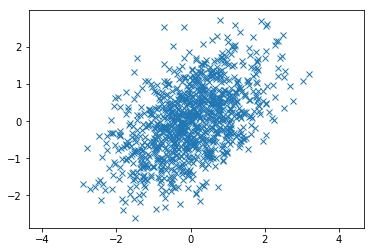

In [28]:

#Now let's plot and see what that looks like


plt.plot(x, y,'x'); plt.axis('equal'); plt.show()

